## Import necessary library & dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf
ipl = pd.read_csv('/content/drive/MyDrive/ML Eng/ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Drop several columns which is not import for this task

In [ ]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [ ]:
'''# Find unique values after label encoding
unique_venues = venue_encoder.inverse_transform(X['venue'].unique())
unique_bat_teams = batting_team_encoder.inverse_transform(X['bat_team'].unique())
unique_bowl_teams = bowling_team_encoder.inverse_transform(X['bowl_team'].unique())
unique_strikers = striker_encoder.inverse_transform(X['batsman'].unique())
unique_bowlers = bowler_encoder.inverse_transform(X['bowler'].unique())

print("Unique Venues:", unique_venues)
print("Unique Batting Teams:", unique_bat_teams)
print("Unique Bowling Teams:", unique_bowl_teams)
print("Unique Strikers:", unique_strikers)
print("Unique Bowlers:", unique_bowlers)'''


'# Find unique values after label encoding\nunique_venues = venue_encoder.inverse_transform(X[\'venue\'].unique())\nunique_bat_teams = batting_team_encoder.inverse_transform(X[\'bat_team\'].unique())\nunique_bowl_teams = bowling_team_encoder.inverse_transform(X[\'bowl_team\'].unique())\nunique_strikers = striker_encoder.inverse_transform(X[\'batsman\'].unique())\nunique_bowlers = bowler_encoder.inverse_transform(X[\'bowler\'].unique())\n\nprint("Unique Venues:", unique_venues)\nprint("Unique Batting Teams:", unique_bat_teams)\nprint("Unique Bowling Teams:", unique_bowl_teams)\nprint("Unique Strikers:", unique_strikers)\nprint("Unique Bowlers:", unique_bowlers)'

### Spilit data

In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']


Label Encdoing for getting categorcial value

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


#### Chcek unique value for below features

In [ ]:
# Find unique values after label encoding
unique_venues = venue_encoder.inverse_transform(X['venue'].unique())
unique_bat_teams = batting_team_encoder.inverse_transform(X['bat_team'].unique())
unique_bowl_teams = bowling_team_encoder.inverse_transform(X['bowl_team'].unique())
unique_strikers = striker_encoder.inverse_transform(X['batsman'].unique())
unique_bowlers = bowler_encoder.inverse_transform(X['bowler'].unique())

print("Unique Venues:", unique_venues)
print("Unique Batting Teams:", unique_bat_teams)
print("Unique Bowling Teams:", unique_bowl_teams)
print("Unique Strikers:", unique_strikers)
print("Unique Bowlers:", unique_bowlers)

Unique Venues: ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Saurashtra 

### Train ,test & evalution the model.

In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Using three Machine Learning Model to find best model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='linear')

# Train models
linear_reg.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
svr.fit(X_train_scaled, y_train)

# Predictions
linear_reg_preds = linear_reg.predict(X_test_scaled)
random_forest_preds = random_forest.predict(X_test_scaled)
svr_preds = svr.predict(X_test_scaled)

# Evaluation
def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} Mean Absolute Error: {mae}")

print("Linear Regression:")
evaluate_model(linear_reg_preds, "Linear Regression")

print("\nRandom Forest Regressor:")
evaluate_model(random_forest_preds, "Random Forest Regressor")

print("\nSupport Vector Regressor:")
evaluate_model(svr_preds, "Support Vector Regressor")


Linear Regression:
Linear Regression Mean Squared Error: 839.5646088837992
Linear Regression Mean Absolute Error: 22.676220159224872

Random Forest Regressor:
Random Forest Regressor Mean Squared Error: 54.463928976415346
Random Forest Regressor Mean Absolute Error: 2.138622819328675

Support Vector Regressor:
Support Vector Regressor Mean Squared Error: 841.5548960291932
Support Vector Regressor Mean Absolute Error: 22.63328501179313


### Random forest regressor giving best result,Thus we will use this model

In [ ]:
import pickle

# Assuming random_forest is your best-performing model
best_model = random_forest

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully.")


Model saved successfully.


In [ ]:
import joblib
joblib.dump(random_forest, 'bestmodel.pickel')

### Checking Deep learning Model .But for this task random regressor are giving good resutl

In [ ]:
# Define the neural network model
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
	keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
	keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
	keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test))


Epoch 1/50
104/104 [==============================] - 3s 6ms/step - loss: 91.1929 - val_loss: 32.3626
Epoch 2/50
104/104 [==============================] - 0s 5ms/step - loss: 30.2582 - val_loss: 27.6655
Epoch 3/50
104/104 [==============================] - 0s 4ms/step - loss: 25.2764 - val_loss: 23.1161
Epoch 4/50
104/104 [==============================] - 0s 4ms/step - loss: 22.6029 - val_loss: 22.1265
Epoch 5/50
104/104 [==============================] - 0s 4ms/step - loss: 22.3199 - val_loss: 22.0837
Epoch 6/50
104/104 [==============================] - 0s 5ms/step - loss: 22.2949 - val_loss: 22.0725
Epoch 7/50
104/104 [==============================] - 0s 4ms/step - loss: 22.2657 - val_loss: 22.0301
Epoch 8/50
104/104 [==============================] - 1s 6ms/step - loss: 22.2443 - val_loss: 22.0158
Epoch 9/50
104/104 [==============================] - 1s 5ms/step - loss: 22.2428 - val_loss: 21.9912
Epoch 10/50
104/104 [==============================] - 1s 6ms/step - loss: 22.2057

<Axes: >

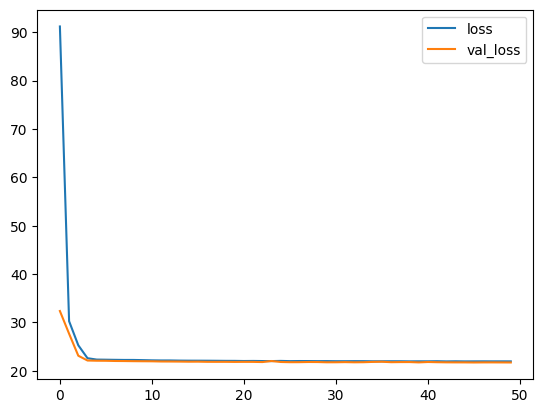

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 [==============================] - 1s 1ms/step


22.21229958629378

In [ ]:
model.save('cricket_score_prediction_model.h5')


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output


		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)
